# Paso 1. Análisis exploratorio de datos
## 1.1 Carga de datos e inspección inicial

In [1]:
import pandas as pd

path1 = '/datasets/project_sql_result_01.csv'
path4 = '/datasets/project_sql_result_04.csv'

df_companies = pd.read_csv(path1)
df_neighborhoods = pd.read_csv(path4)

print("Empresas y viajes (primeros 5 registros):")
print(df_companies.head(), "\n")

print("Barrios y promedio de viajes (primeros 5 registros):")
print(df_neighborhoods.head(), "\n")

print("Tipos df_companies:")
print(df_companies.dtypes, "\n")

print("Tipos df_neighborhoods:")
print(df_neighborhoods.dtypes, "\n")


Empresas y viajes (primeros 5 registros):
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

Barrios y promedio de viajes (primeros 5 registros):
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000 

Tipos df_companies:
company_name    object
trips_amount     int64
dtype: object 

Tipos df_neighborhoods:
dropoff_location_name     object
average_trips            float64
dtype: object 



## 1.2 Asegurar tipos de datos correctos

In [2]:
top10_barrios = (
    df_neighborhoods
    .sort_values('average_trips', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("Top 10 barrios por promedio de viajes:")
print(top10_barrios)


Top 10 barrios por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## 1.3 Identificación de los 10 barrios principales

In [3]:
top10_barrios = (
    df_neighborhoods
    .sort_values('average_trips', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("Top 10 barrios por promedio de viajes:")
print(top10_barrios)


Top 10 barrios por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## 1.4 Visualizaciones

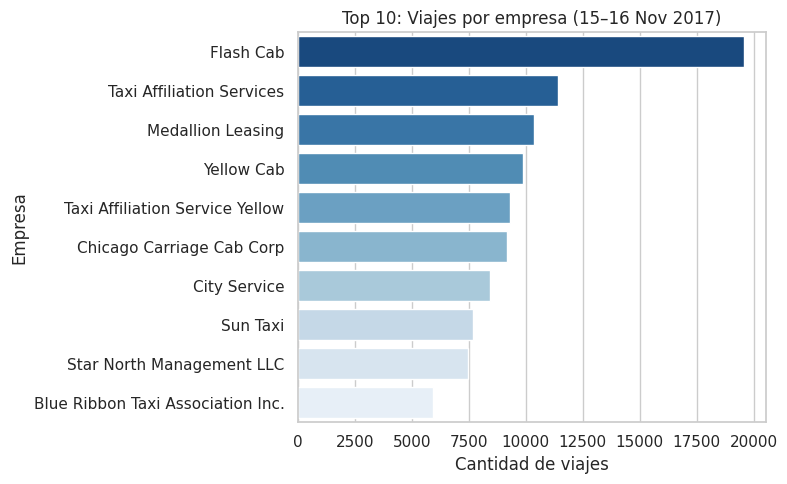

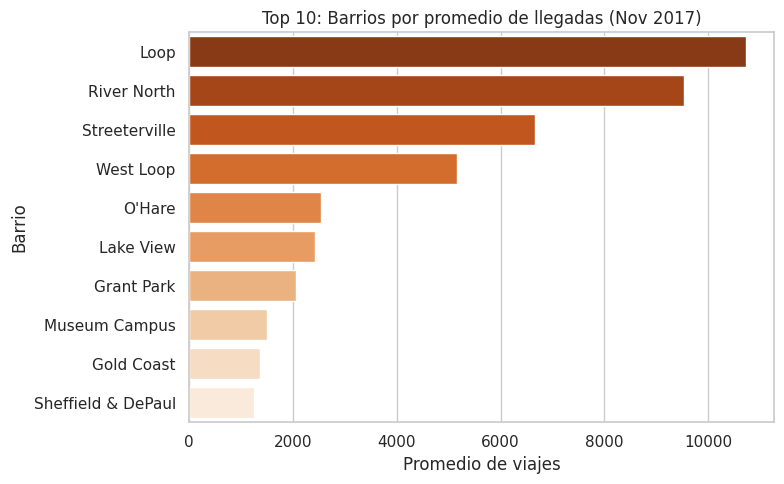

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

top10_companies = (
    df_companies
    .sort_values('trips_amount', ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top10_companies,
    x='trips_amount',
    y='company_name',
    palette='Blues_r'
)
plt.title('Top 10: Viajes por empresa (15–16 Nov 2017)')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
sns.barplot(
    data=top10_barrios,
    x='average_trips',
    y='dropoff_location_name',
    palette='Oranges_r'
)
plt.title('Top 10: Barrios por promedio de llegadas (Nov 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()


## 4.5 Conclusiones
El gráfico de empresas muestra claramente qué compañía movilizó más pasajeros durante el fin de semana del 15–16 de noviembre. Una gran diferencia entre primer y segundo lugar puede indicar dominio de mercado o campañas puntuales de promoción, en este caso, Flash Cab.


En el top 10 de barrios, los distritos con mayor actividad (centro financiero, zonas turísticas) sobresalen, lo que sugiere que el flujo de pasajeros en noviembre se concentra en áreas de alta densidad comercial y transporte, Loop es el que sobresale.


Ambos de estos insights permiten a Zuber ajustar su cobertura de flota: reforzar número de autos en las empresas líderes durante picos de demanda y estacionar vehículos cerca de los barrios más activos para reducir tiempos de espera.

# Paso 2. Prueba de Hipótesis

## 2.1 Carga de datos y separación de grupos

In [5]:
import pandas as pd
from scipy import stats

df = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

durations_bad  = df.loc[df.weather_conditions == 'Bad',  'duration_seconds']
durations_good = df.loc[df.weather_conditions == 'Good', 'duration_seconds']


## 2.2 Planteamiento de hipótesis
Hipótesis nula (H₀): la duración promedio es igual en sábados lluviosos y no lluviosos.

Hipótesis alternativa (H₁): la duración promedio difiere entre sábados lluviosos y no lluviosos.

Este enfoque bilateral nos permite detectar un aumento o una disminución en la duración debido al mal tiempo.

## 2.3 Criterio de prueba y nivel de significación
Nivel de significación: α = 0.05.

Prueba seleccionada: test t de Student para muestras independientes con varianzas desiguales (Welch’s t-test).

Justificación: al comparar dos medias de grupos distintos y no asumir varianzas iguales, Welch controla mejor el error tipo I.

## 2.4 Implementación de la prueba

In [6]:
stat_levene, p_levene = stats.levene(durations_bad, durations_good)
equal_var = p_levene > 0.05  # True si no rechazamos H0 de Levene

t_stat, p_value = stats.ttest_ind(
    durations_bad,
    durations_good,
    equal_var=equal_var
)

print(f"Levene p-value = {p_levene:.4f} → equal_var = {equal_var}")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

Levene p-value = 0.5332 → equal_var = True
t-statistic = 6.9462, p-value = 0.0000


## 2.3 Interpretación de resultados
* El test de Levene arrojó p-value = 0.5332, por lo que no rechazamos la igualdad de varianzas y podemos usar el t-test de Student estándar (equal_var=True).

* El t-test resultó en t-statistic = 6.9462 con p-value ≈ 0.0000.

Dado que p-value < 0.05, rechazamos la hipótesis nula de medias iguales. Esto significa que, con un nivel de significación α = 0.05, hay evidencia estadística muy fuerte de que la duración promedio de los viajes Loop → O’Hare difiere en sábados lluviosos respecto a sábados con buen clima.

Además, como el estadístico t es positivo y significativo, concluimos que los viajes en sábados lluviosos (Bad) son en promedio más largos que en sábados con buen clima (Good). Esto apoya la idea de que la lluvia genera retrasos y tiempos de trayecto mayores.